Saving SampleVideo_1280x720_5mb.mp4 to SampleVideo_1280x720_5mb (1).mp4


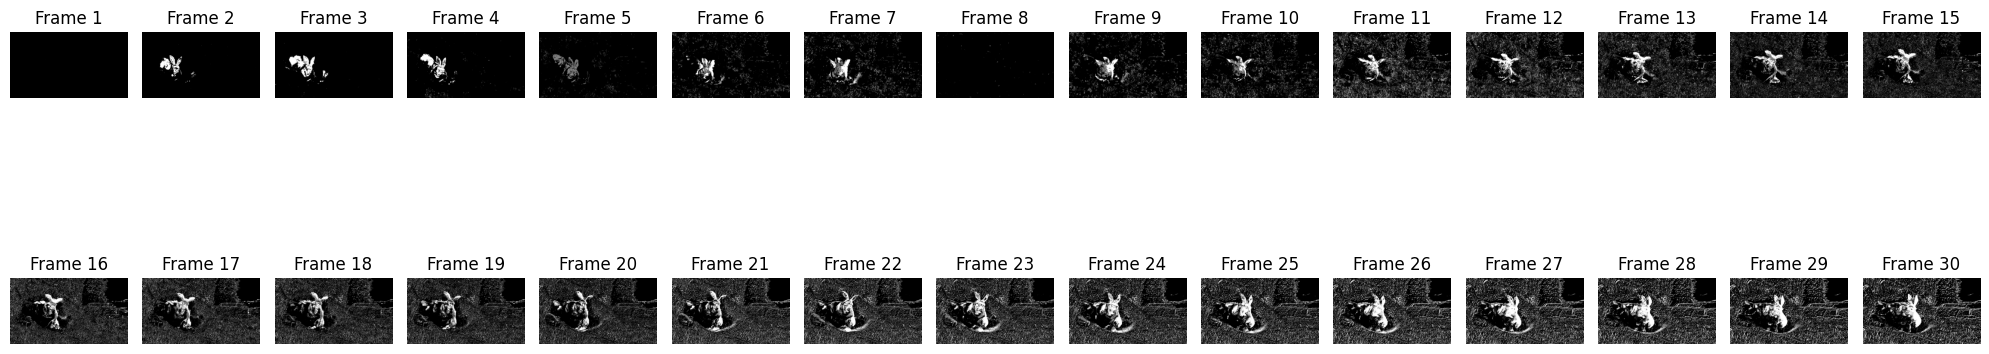

In [5]:
# Import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Upload a video file (Colab-specific)
from google.colab import files
uploaded = files.upload()

# Read the video file (use the uploaded file's name)
video_path = list(uploaded.keys())[0]
video = cv.VideoCapture(video_path)

# Create the background subtractor
fgbg = cv.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# Process the video frames
frames = []
masks = []
while len(frames) < 30:  # Limit to 30 frames for visualization
    ret, frame = video.read()
    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Append the original frame and mask for visualization
    frames.append(cv.cvtColor(frame, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
    masks.append(fgmask)

video.release()

# Visualize the results using Matplotlib
plt.figure(figsize=(20, 10))
for i in range(len(frames)):
    plt.subplot(2, len(frames) // 2, i + 1)
    plt.imshow(masks[i], cmap='gray')
    plt.title(f"Frame {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
